In [ ]:
import pandas as pd 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

import matplotlib.pyplot as plt

import scikitplot as skplt

In [ ]:
df= pd.read_csv('./data/consensus_dataset.csv').drop(columns = 'Unnamed: 0')
df

,ad,consensus
0,we are fighting against a 1 million smear camp...,1
1,big thanks to our freenewyork partners and th...,0
2,we need your help to hit our fundraising goal ...,1
3,should sacramento stop loyalty programs for ho...,0
4,urgent we just launched ads against mitch mcco...,1
...,...,...
13271,let’s declare war on israel from the title of ...,1
13272,some legislators tell us “not in my backyard” ...,1
13273,youre invited to a live debate on question ho...,0
13274,no one should be left behind when it comes to ...,0


In [ ]:
X_train, X_test, y_train, y_test= train_test_split( df['ad'], df['consensus'], test_size =0.2, random_state= 42)

In [ ]:
# Use term frequency to represent documents
tf_vectorizer = CountVectorizer() 

X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)

In [ ]:
# create and train the multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_tf,y_train)

MultinomialNB()

accuracy:   0.843
              precision    recall  f1-score   support

no consensus       0.99      0.72      0.83      1418
   consensus       0.75      0.99      0.85      1238

    accuracy                           0.84      2656
   macro avg       0.87      0.85      0.84      2656
weighted avg       0.88      0.84      0.84      2656

confusion matrix:
[[1015  403]
 [  13 1225]]



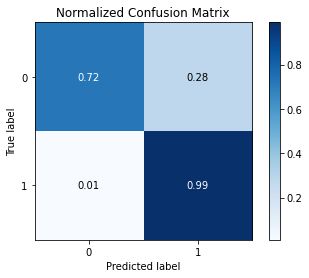

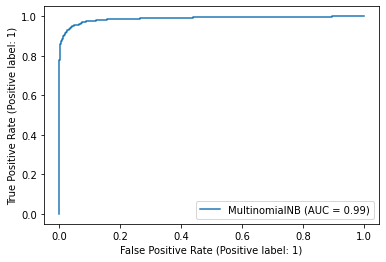

In [ ]:
# make predictions
y_pred = clf.predict(X_test_tf)

# model performance
score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_test, y_pred, target_names=['no consensus', 'consensus']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))
print()

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()
disp = metrics.RocCurveDisplay.from_estimator(clf, X_test_tf, y_test)

In [ ]:
df_val = pd.read_csv('./data/sample_consensus.csv')
df_val

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


,ad,consensus
0,virtually everyone knows america has a big ill...,1
1,everyone knows smoking causes cancer but did y...,1
2,virtually everyone knows america has a big ill...,1
3,everyone knows michigan auto insurance is the ...,1
4,canadians from every region have shared with m...,1
5,voters want free and fair elections when im go...,1
6,massive crowds last evening for the meeting on...,1
7,several questions have come my way since the a...,0
8,brad recently stopped by to talk to henry hint...,0
9,british chickens are typically fed on soya fro...,0


accuracy:   0.643
              precision    recall  f1-score   support

no consensus       0.00      0.00      0.00         5
   consensus       0.64      1.00      0.78         9

    accuracy                           0.64        14
   macro avg       0.32      0.50      0.39        14
weighted avg       0.41      0.64      0.50        14

confusion matrix:
[[0 5]
 [0 9]]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


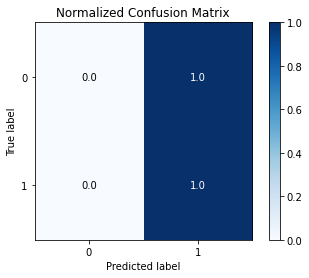

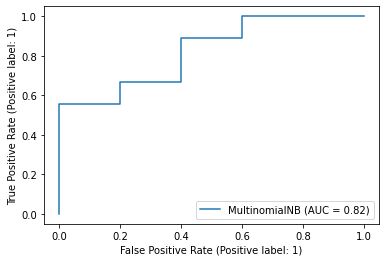

In [ ]:
X_val = tf_vectorizer.transform(df_val['ad'])
y_val = df_val['consensus']

y_pred = clf.predict(X_val)

score = metrics.accuracy_score(y_val, y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_val, y_pred, target_names=[ 'no consensus', 'consensus']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_val, y_pred))
print()

skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)
plt.show()
disp = metrics.RocCurveDisplay.from_estimator(clf, X_val, y_val)

df_val['predictions'] = y_pred